## GRIP - May23 @ The Sparks Foundation

## Author - Anand Kumar CS


## Task 2 -  Predicting the optimum number of cluster and represent it visually.

In [11]:
# Importing Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.simplefilter('ignore')
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,8)

### Step 1: Load the Dataset

In [12]:
# load the data 
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step 2: Descriptive Statistic

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
# Checking for NaN values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [24]:
# Checking statistical description
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Step 3: Data Visualization

In [27]:
#Now, let's check for unique classes in the dataset.

print(f"Total number of Unique Classes are {df.species.nunique()}")

Total number of Unique Classes are 3


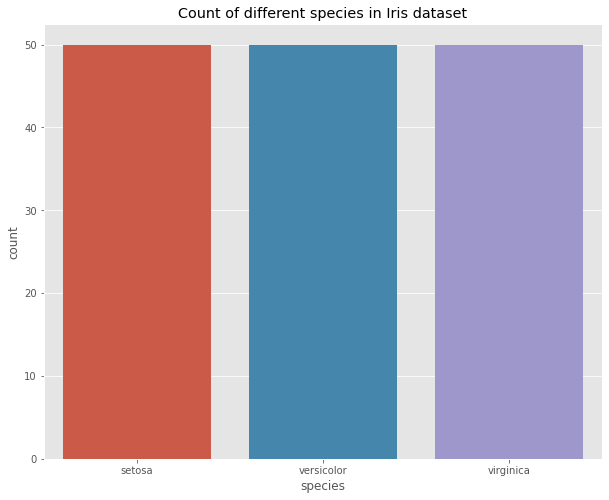

In [29]:
sns.countplot(x='species', data=df)
plt.title("Count of different species in Iris dataset")
plt.show()

#all the Three Species are having equal no of observation(50)

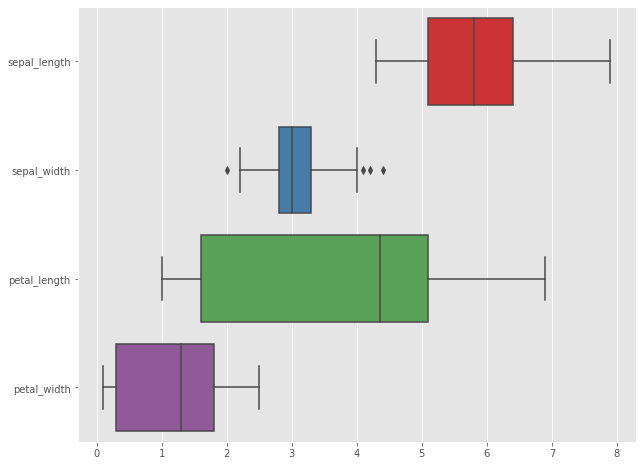

In [46]:
sns.boxplot(data=df, orient="h", palette="Set1")
plt.show()

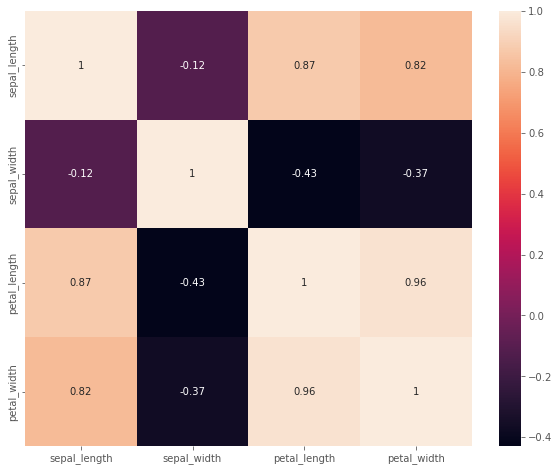

In [31]:
sns.heatmap(df.corr(),annot = True)
plt.show()

### Step4: Preparing the Data

In [32]:
# Segrgate the independent and dependent features
X = df.drop(['species'],axis=1)
X = X.values

### Step5: Finding the Optimal Value of K

For Finding the optimal Value of K in the K_Means Algorithm two methods are there 

**Elbow Plot
**Sillhoute Score

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [70]:
wcss = [] #Within Cluster Sum of Squares
silhouette_scores = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette)

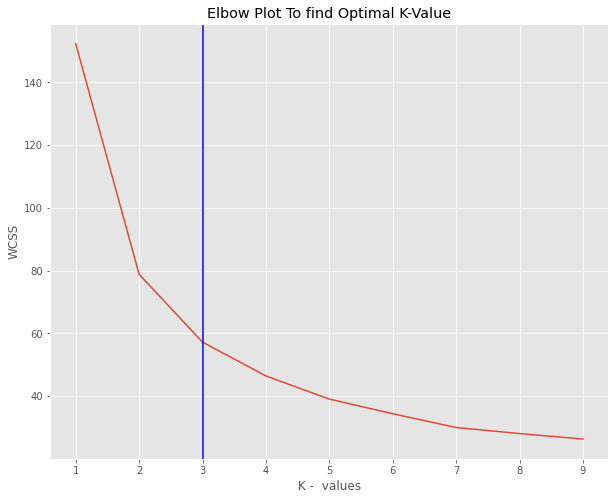

In [73]:
plt.plot(range(1,10),wcss)
plt.xlabel('K -  values')
plt.ylabel('WCSS')
plt.axvline(x=3,color="b")
plt.title("Elbow Plot To find Optimal K-Value")
plt.show()

From K= 1 to K= 2, there is large drop
From K= 2 to K= 3, there is slight drop
After K= 3, slop is almost constant

Hence, value of `K=3 implies an Optimal Value of K-Clusters`

In [76]:
# Print silhouette scores
for k, score in enumerate(silhouette_scores, start=2):
    print(f"K = {k}, Silhouette Score = {score}")

K = 2, Silhouette Score = 0.6810461692117465
K = 3, Silhouette Score = 0.5528190123564102
K = 4, Silhouette Score = 0.49805050499728803
K = 5, Silhouette Score = 0.48874888709310654
K = 6, Silhouette Score = 0.3678464984712254
K = 7, Silhouette Score = 0.3475042328046173
K = 8, Silhouette Score = 0.3520039484603357
K = 9, Silhouette Score = 0.340176989914499
K = 10, Silhouette Score = 0.3143173502478775


Text(0.5, 1.0, 'Silhouette Score Plot to Find Optimal K-Value')

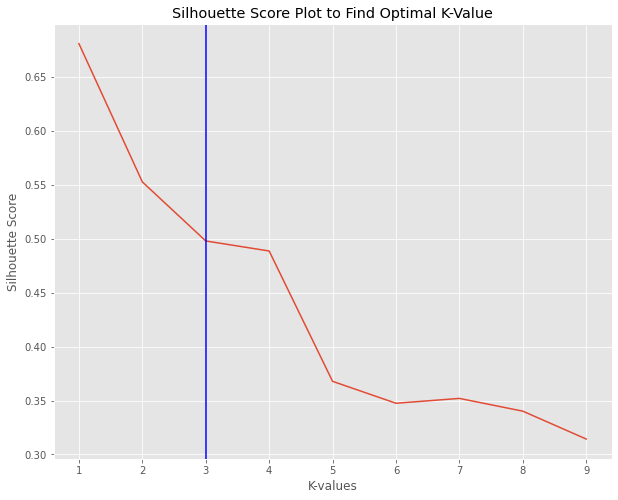

In [74]:
# Plotting Silhouette Scores
plt.plot(range(1, 10), silhouette_scores)
plt.xlabel('K-values')
plt.ylabel('Silhouette Score')
plt.axvline(x=3, color="b")
plt.title("Silhouette Score Plot to Find Optimal K-Value")

In [77]:
#from both the Elbow plot and Silhouette Score we can able to see the optimal k_value as 3

In [78]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [79]:
y_label = kmeans.fit_predict(X)

### Step6: Visualising the cluster

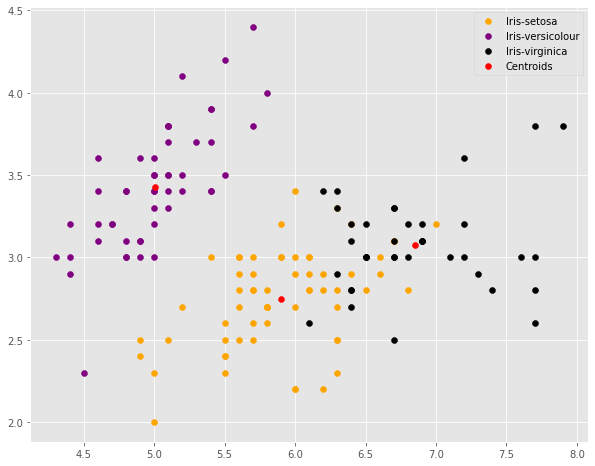

In [80]:
plt.scatter(X[y_label == 0, 0], X[y_label == 0, 1], 
             c = 'orange', label = 'Iris-setosa')
plt.scatter(X[y_label == 1, 0], X[y_label == 1, 1], 
             c = 'purple', label = 'Iris-versicolour')
plt.scatter(X[y_label == 2, 0], X[y_label == 2, 1],
             c = 'black', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
             c = 'red', label = 'Centroids')

plt.legend()
plt.show()